# Examples and Exercises from Think Stats, 2nd Edition

http://thinkstats2.com

Copyright 2016 Allen B. Downey

MIT License: https://opensource.org/licenses/MIT


In [1]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import brfss

import thinkstats2
import thinkplot

## The estimation game


Root mean squared error is one of several ways to summarize the average error of an estimation process.

In [2]:
def RMSE(estimates, actual):
    """Computes the root mean squared error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float RMSE
    """
    e2 = [(estimate-actual)**2 for estimate in estimates]
    mse = np.mean(e2)
    return np.sqrt(mse)

The following function simulates experiments where we try to estimate the mean of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and collect the mean and median of each sample.

In [3]:
import random

def Estimate1(n=7, iters=1000):
    """Evaluates RMSE of sample mean and median as estimators.

    n: sample size
    iters: number of iterations
    """
    mu = 0
    sigma = 1

    means = []
    medians = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for _ in range(n)]
        xbar = np.mean(xs)
        median = np.median(xs)
        means.append(xbar)
        medians.append(median)

    print('Experiment 1')
    print('rmse xbar', RMSE(means, mu))
    print('rmse median', RMSE(medians, mu))
    
Estimate1()

Experiment 1
rmse xbar 0.3841227716982232
rmse median 0.4591608077516392


Using $\bar{x}$ to estimate the mean works a little better than using the median; in the long run, it minimizes RMSE.  But using the median is more robust in the presence of outliers or large errors.


## Estimating variance

The obvious way to estimate the variance of a population is to compute the variance of the sample, $S^2$, but that turns out to be a biased estimator; that is, in the long run, the average error doesn't converge to 0.

The following function computes the mean error for a collection of estimates.

In [4]:
def MeanError(estimates, actual):
    """Computes the mean error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    return np.mean(errors)

The following function simulates experiments where we try to estimate the variance of a population based on a sample with size `n=7`.  We run `iters=1000` experiments and two estimates for each sample, $S^2$ and $S_{n-1}^2$.

In [5]:
def Estimate2(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean error biased', MeanError(estimates1, sigma**2))
    print('mean error unbiased', MeanError(estimates2, sigma**2))
    
Estimate2()

mean error biased -0.1304151885329133
mean error unbiased 0.014515613378267815


The mean error for $S^2$ is non-zero, which suggests that it is biased.  The mean error for $S_{n-1}^2$ is close to zero, and gets even smaller if we increase `iters`.

## The sampling distribution

The following function simulates experiments where we estimate the mean of a population using $\bar{x}$, and returns a list of estimates, one from each experiment.

In [6]:
def SimulateSample(mu=90, sigma=7.5, n=9, iters=1000):
    xbars = []
    for j in range(iters):
        xs = np.random.normal(mu, sigma, n)
        xbar = np.mean(xs)
        xbars.append(xbar)
    return xbars

xbars = SimulateSample()

Here's the "sampling distribution of the mean" which shows how much we should expect $\bar{x}$ to vary from one experiment to the next.

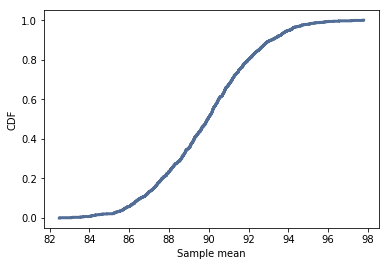

In [7]:
cdf = thinkstats2.Cdf(xbars)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample mean',
                 ylabel='CDF')

The mean of the sample means is close to the actual value of $\mu$.

In [8]:
np.mean(xbars)

89.8899816836576

An interval that contains 90% of the values in the sampling disrtribution is called a 90% confidence interval.

In [9]:
ci = cdf.Percentile(5), cdf.Percentile(95)
ci

(85.80205234754015, 94.05491353221086)

And the RMSE of the sample means is called the standard error.

In [10]:
stderr = RMSE(xbars, 90)
stderr

2.4991222841949723

Confidence intervals and standard errors quantify the variability in the estimate due to random sampling.

## Estimating rates

The following function simulates experiments where we try to estimate the mean of an exponential distribution using the mean and median of a sample. 

In [11]:
def Estimate3(n=7, iters=1000):
    lam = 2

    means = []
    medians = []
    for _ in range(iters):
        xs = np.random.exponential(1.0/lam, n)
        L = 1 / np.mean(xs)
        Lm = np.log(2) / thinkstats2.Median(xs)
        means.append(L)
        medians.append(Lm)

    print('rmse L', RMSE(means, lam))
    print('rmse Lm', RMSE(medians, lam))
    print('mean error L', MeanError(means, lam))
    print('mean error Lm', MeanError(medians, lam))
    
Estimate3()

rmse L 1.0216956094617848
rmse Lm 1.8745880918871731
mean error L 0.30321069814234836
mean error Lm 0.5065659992123706


The RMSE is smaller for the sample mean than for the sample median.

But neither estimator is unbiased.

## Exercises

**Exercise:**  In this chapter we used $\bar{x}$ and median to estimate µ, and found that $\bar{x}$ yields lower MSE. Also, we used $S^2$ and $S_{n-1}^2$ to estimate σ, and found that $S^2$ is biased and $S_{n-1}^2$ unbiased.
Run similar experiments to see if $\bar{x}$ and median are biased estimates of µ. Also check whether $S^2$ or $S_{n-1}^2$ yields a lower MSE.

In [12]:
# Solution goes here

def Estimate4(n=7, iters=1000):
    
    #standard normal distribution
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        
        #randomly sample from defined normal distribution
        xs = [random.gauss(mu, sigma) for i in range(n)]
        
        #calculate the mean and the median of the sample
        mean=np.mean(xs)
        median=np.median(xs)
        estimates1.append(mean)
        estimates2.append(median)

    print('mean error sample mean', MeanError(estimates1, mu))
    print('mean error sample median', MeanError(estimates2, mu))
    
Estimate4()

mean error sample mean 0.010060066907820756
mean error sample median 0.0004341300797098646


In [13]:
#Interpretation: the sample mean and the sample median are unbiased estimates of the population mean.

In [14]:
# Solution goes here

def MeanSquareError(estimates, actual):
    """Computes the mean square error of a sequence of estimates.

    estimate: sequence of numbers
    actual: actual value

    returns: float mean error
    """
    errors = [estimate-actual for estimate in estimates]
    sqerrors = np.array(errors)**2.
    return np.sum(sqerrors)/len(sqerrors)

def Estimate5(n=7, iters=1000):
    mu = 0
    sigma = 1

    estimates1 = []
    estimates2 = []
    for _ in range(iters):
        xs = [random.gauss(mu, sigma) for i in range(n)]
        biased = np.var(xs)
        unbiased = np.var(xs, ddof=1)
        estimates1.append(biased)
        estimates2.append(unbiased)

    print('mean square error biased', MeanSquareError(estimates1, sigma**2))
    print('mean square error unbiased', MeanSquareError(estimates2, sigma**2))
    
Estimate5()

mean square error biased 0.264105223087499
mean square error unbiased 0.3265130962358529


In [15]:
#Interpretation: The MSE of the biased variance is lower than the unbiased variance. 
# NB: MSE = Bias^2 + Variance
# NB: There may be some applications for selecting the biased sample variance if it produces a lower MSE than
# the unbiased variance method. Is a lower bias worth an increased variance?
# https://stats.stackexchange.com/questions/207760/when-is-a-biased-estimator-preferable-to-unbiased-one

**Exercise:** Suppose you draw a sample with size n=10 from an exponential distribution with λ=2. Simulate this experiment 1000 times and plot the sampling distribution of the estimate L. Compute the standard error of the estimate and the 90% confidence interval.

Repeat the experiment with a few different values of `n` and make a plot of standard error versus `n`.



In [16]:
# Solution goes here

#Randomly sampling an exponential distribution
lam=2
def SimulateExpSample(lam=lam, n=10, iters=1000):
    
    xbars = [] #means of samples
    Lsamples = [] #L=1/lambda of samples
    
    for j in range(iters):
        
        #random sample from exponential distribution
        xs = np.random.exponential(scale=1./lam, size=n)
        
        #sample mean
        xbar = np.mean(xs)
        xbars.append(xbar)
        
        #L=1/lambda parameter
        L = 1./xbar
        Lsamples.append(L)
       
    Lsamples = np.sort(Lsamples)
    return Lsamples

Lsamples = SimulateExpSample()


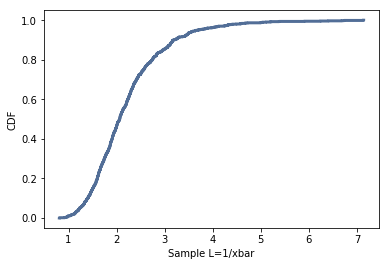

In [17]:
# Solution goes here

#plotting the sampling distribution

cdf = thinkstats2.Cdf(Lsamples)
thinkplot.Cdf(cdf)
thinkplot.Config(xlabel='Sample L=1/xbar',
                 ylabel='CDF')

In [18]:
# Solution goes here

#mean of Lsamples
print('Mean of L samples = ', np.mean(Lsamples))

#the standard error of L
print('RMSE=SE of lambda~L=1/xbar: ',MeanSquareError(Lsamples, lam)**0.5)
#could also use instead: print('standard error', RMSE(Lsamples, lam))

#90% confidence interval; range from the 5th to the 95th percentile
lowlim_index = int(len(Lsamples)*0.05)
upperlim_index = int(len(Lsamples)*0.95)
print('90% CI: ', Lsamples[lowlim_index], ',', Lsamples[upperlim_index])

Mean of L samples =  2.2200093460148853
RMSE=SE of lambda~L=1/xbar:  0.8443412346716321
90% CI:  1.2344715965843835 , 3.697658898614893


**Exercise:** In games like hockey and soccer, the time between goals is roughly exponential. So you could estimate a team’s goal-scoring rate by observing the number of goals they score in a game. This estimation process is a little different from sampling the time between goals, so let’s see how it works.

Write a function that takes a goal-scoring rate, `lam`, in goals per game, and simulates a game by generating the time between goals until the total time exceeds 1 game, then returns the number of goals scored.

Write another function that simulates many games, stores the estimates of `lam`, then computes their mean error and RMSE.

Is this way of making an estimate biased?

In [19]:
def SimulateGame(lam):
    """Simulates a game and returns the estimated goal-scoring rate.

    lam: actual goal scoring rate in goals per game
    """
    goals = 0
    t = 0
    while True:
        time_between_goals = random.expovariate(lam)
        t += time_between_goals
        if t > 1:
            break
        goals += 1

    # estimated goal-scoring rate is the actual number of goals scored
    L = goals
    return L

MeanError(L) =  -0.00238
RMSE(L) =  3.1714066279807134
90% CI:  5 , 15


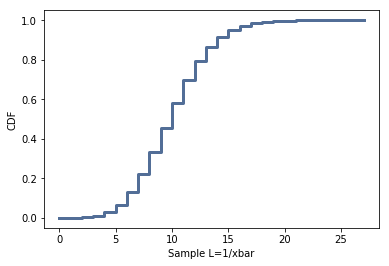

In [20]:
# Solution goes here

def SimulateGame_many(lam, iters=100000):
    
    L_estimates=[]
    for ii in range(0,iters):
        L = SimulateGame(lam)
        L_estimates.append(L)
    L_estimates = np.sort(L_estimates)
    
    #calculate mean error
    print('MeanError(L) = ', MeanError(L_estimates, lam))
    #calculate RMSE
    print('RMSE(L) = ', RMSE(L_estimates, lam))
    
    #90% confidence interval; range from the 5th to the 95th percentile
    lowlim_index = int(len(L_estimates)*0.05)
    upperlim_index = int(len(L_estimates)*0.95)
    print('90% CI: ', L_estimates[lowlim_index], ',', L_estimates[upperlim_index])
    
    #plotting the sampling distribution
    cdf = thinkstats2.Cdf(L_estimates)
    thinkplot.Cdf(cdf)
    thinkplot.Config(xlabel='Sample L=1/xbar',
                     ylabel='CDF')
    
SimulateGame_many(lam=10)


In [21]:
# Solution goes here

#Interpretation: RMSE(L) is much larger than the MeanError(L). An unbiased estimator has a mean error that converges 
# to 0 after many iterations of sampling. Mean error determines if our model for estimating population L is biased; 
# RMSE determines error on the L estimation method (due to sampling?). Could also compare the RMSE of L to the 
# RMSE of Lm, calculated using the median. The better estimator for the population lambda will be whether L or Lm 
# has a smaller RMSE.

# The sampling distribution of L will be right skewed if population lambda is close to 0, with asymmetric error bars
# because L must be positive and an integer. 
